In [13]:
import nltk
from nltk.corpus import stopwords
import re
import string
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pickle

In [25]:
nltk.download('stopwords')

# Initialize stemmer and stopwords
stemer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words("english"))

# Read data
data = pd.read_csv("FinalBalancedDataset.csv")
data.tail(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kinge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Toxicity,tweet
56735,56735,1,you niggers cheat on ya gf's? smh....
56736,56736,1,you really care bout dis bitch. my dick all in...
56737,56737,1,"you worried bout other bitches, you need me for?"
56738,56738,1,you're all niggers
56739,56739,1,you're such a retard i hope you get type 2 dia...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies
56744,56744,0,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [27]:
# Map class labels to more descriptive labels
data["labels"] = data["Toxicity"].map({0: "No Hate and Offensive Speech", 1: "Offensive Language"})
data = data[["tweet", "labels"]]

In [28]:
data

,tweet,labels
0,@user when a father is dysfunctional and is s...,No Hate and Offensive Speech
1,@user @user thanks for #lyft credit i can't us...,No Hate and Offensive Speech
2,bihday your majesty,No Hate and Offensive Speech
3,#model i love u take with u all the time in ...,No Hate and Offensive Speech
4,factsguide: society now #motivation,No Hate and Offensive Speech
...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
56741,"you've gone and broke the wrong heart baby, an...",Offensive Language
56742,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
56743,youu got wild bitches tellin you lies,Offensive Language


In [29]:
def clean(text):
    text = str(text).lower()
    text = re.sub('^.*?:', '', text)  # Remove all words before and including the first colon
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

# Apply the clean function to the tweet column
data["tweet"] = data["tweet"].apply(clean)

<>:4: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\kinge\AppData\Local\Temp\ipykernel_2588\75384094.py:4: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\kinge\AppData\Local\Temp\ipykernel_2588\75384094.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\kinge\AppData\Local\Temp\ipykernel_2588\75384094.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [30]:
x = np.array(data["tweet"])
y = np.array(data["labels"])
cv = CountVectorizer()
x = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train


<38019x48066 sparse matrix of type '<class 'numpy.int64'>'
	with 274928 stored elements in Compressed Sparse Row format>

In [31]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
print("Model Accuracy:", model.score(x_test, y_test))

Model Accuracy: 0.8952258891380968


In [35]:
sample = "I love my mom"
data = cv.transform([sample]).toarray()
print(model.predict(data))

['No Hate and Offensive Speech']


In [45]:
pickle.dump(model, open("hatehmodel.pkl", 'wb'))
pickle.dump(cv, open("cv.pkl", 'wb'))

In [43]:
def generate_wordcloud_from_csv(file_path):
    df = pd.read_csv('FinalBalancedDataset.csv')
    
    # Clean text: remove all words before the colon and apply the clean function
    df['cleaned_tweet'] = df['tweet'].apply(lambda x: clean(x.split(':', 1)[-1] if ':' in x else x))
    text = " ".join(tweet for tweet in df['cleaned_tweet'])
    
    stopwords = set(STOPWORDS)
    stopwords.update(["is", "in", "and", "RT", "then","user","ð"])
    
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='Reds',
        stopwords=stopwords,
        max_font_size=100,
        random_state=42
    ).generate(text)

    return wordcloud

wordcloud = generate_wordcloud_from_csv("FinalBalancedDataset.csv")

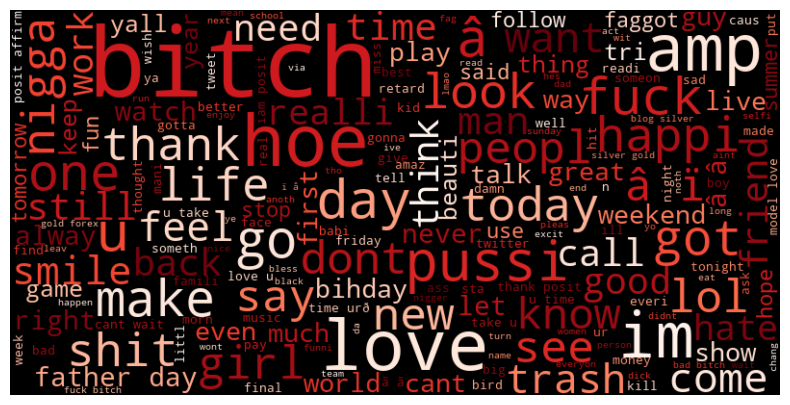

In [44]:
# Display the generated Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()